## Problema do Par de Pontos mais Próximos

O **Problema do par de pontos mais próximo** é formulado da seguinte forma: dado um conjunto de $n$ pontos $$P = \{p_1, p_2, p_3, ..., p_n\}$$ em um espaço bidimensional, onde cada ponto $p_i = (x_i, y_i)$ é representado por suas coordenadas $x_i$ e $y_i$, a finalidade é encontrar os  pontos $p_i$ e $p_j$,  $i\neq j$ em $P$ tais que a distância entre $p_i$ e $p_j$, $d(p_i,p_j)$, seja minimizada. 

Note que a restrição, $i\neq j$, indica que pontos são distintos. A distância entre dois pontos $p_i$ e $p_j$ pode ser calculada usando a fórmula de distância euclidiana: $$d(p_i,p_j) = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}.$$


- Conjunto de pontos:

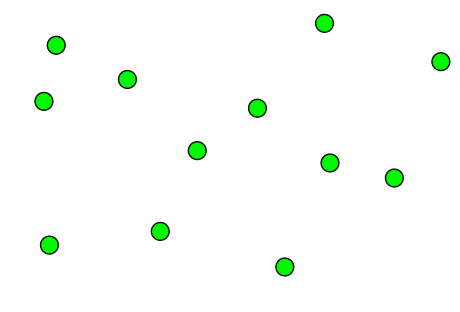

### Algoritmo usando força bruta.

- Teste cada um dos pares de pontos de $P$ para ver se eles são o par mais próximo.

-  Cuso de operações $O(n^2)$: bata pensar que teremos $\binom{n}{2} = \frac{n!}{2!(n-2)!}=\frac{n(n-1)}{2}$ pares para serem testados.

A seguir sugerimos uma implementação:




In [21]:
import math
def dist(p, q):
    d = math.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)
    return d
def par_proximo_bruta(pontos):
    pares_proximos = [pontos[0], pontos[1]]
    for i in range(len(pontos)):
        for j in range(i + 1, len(pontos)): # i != j
            if dist(pontos[i], pontos[j]) < dist(pares_proximos[0], pares_proximos[1]):
                pares_proximos = [pontos[i], pontos[j]]
    return pares_proximos


**Exemplo**. Dado $P = \{(2, 3), (12, 30), (40, 50), (5, 1), (12, 10), (3, 4)\}$ encontre o par de pontos mais próximos.

In [57]:
pontos = [(2, 3), (12, 30), (40, 50), (5, 1), (12, 10), (3, 4)]
par_proximo_bruta(pontos)

[(2, 3), (3, 4)]

#### Algoritmo usando **divisão e conquista**

1. **Dividir**. Dividimos $P$ em $P_l$, $P_r$ pela linha vertical $L$ definida pela mediana da coordenada $x$ dos pontos de $P$.

2. Recursivamente encontramos o par de pontos mais próximo em cada parte. Digamos que sejam os pares $(p_1, p_2)$, $dist(p_1, p_2)=d_{\text{left}}$, na parte esquerda e $(p_3, p_4)$, $dist(p_3, p_4)=d_{\text{right}}$, na parte direita.


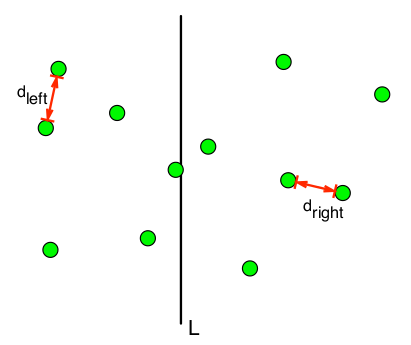

3. Tome $d= min\{d_{\text{left}}, d_{\text{right}}\}$. **Obs**. $d$ seria a resposta, exceto talvez se $L$ dividisse um par próximo!

4. **Região próxima a $L$.**Se houver um par $\{p_i , p_j\}$ com $dist(p_i , p_j ) < d$ que está dividido pela linha $L$, então $p_i$ e $p_j$ devem estar dentro da distância $d$ de $ L$. Defina um conjunto $P_y$ dos pontos nessa região, ordenando-os pelo valor decrescente da coordenada $y$ de cada ponto.




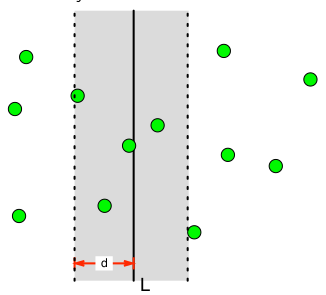

5. Encontre o par de pontos, digamos, $(p_5, p_6)$ mais próximo **na região próxima a** $L$. Ou seja, no conjunto $P_y$.

6. Encontre o par de ponto mais próximo entre os pares $(p_1, p_2)$, $(p_3,p_4)$, $(p_5, p_6)$.

#### E se todos os ponntos estão na Região próxima de $L$?

**Teorema.** Suponha que $P_y = \{p_1 , \ldots , p_m\}$ . Se $dist(p_i , p_j ) < d$ então $|j − i| ≤ 15$.

Já que $P_y$ tem pontos de $P_l$ e $P_r$ nós só precisamos testar no máximo $8$ pontos. Então, para cada ponto $p_i \in P_y$  precisamos testar $p_i, p_{i+1}, p_{i+2}, \ldots, p_{i+7}$ .

**Exemplo**. Dado o conjunto $P =\{(2, 3), (12, 30), (40, 50), (5, 1), (12, 10), (3, 4)\}$. Encontre o par de pontos mais próximo.


- A ordenação do pontos em $P$ usando a coordenada $x_i$ como referência gera
  \begin{align*} 
   P =\{(2,3), (3,4), (5, 1), (12, 10), (12, 30), (40, 50)\}
   \end{align*}
- Dividindo em dois subconjuntos pela mediana  $m=8.5$ em relação a coordenada $x$ temos:

\begin{align*}
    P_l &= \{p_1=(2,3), p_2=(3,4), p_3=(5, 1)\}\\
    P_r &= \{p_4=(12, 10), p_5=(12, 30), p_6=(40, 50) \}
\end{align*}

- Assim, com $d(p_1, p_2)=\sqrt{2}$, $p_1, p_2$ é par de pontos mais próximo em $P_E$. 

- Da mesma forma,  com $d(p_4, p_5)=20$, $p_4, p_5$ é  par de pontos  mais próximo em $P_R$. Portanto, a distância mínima entre o par de pontos mais próximo em $P_l$ e $P_r$ é $d=\min(d(p_1, p_2), d(p_4, p_5))=\sqrt{2}$. 

- Agora vamos tomar todos os pontos de $P$ tais que $|x_i-m|<\sqrt{2}$ para encontrar o subconjunto $P_y=\{p_4=(12,10), p_5=(12, 30)\}$ com um único par. Observe que esse ponto está em $P_r$. 

- Finalmente, o par de pontos mais próximo de $P$ é $p_1, p_2$ ou $p_4, p_5$. Calculando a distância encontramos que o par $(p_1=(2,3),  p_2=(3, 4))$  é o mais próximo em $P$.

### Implementação (número impar de pontos)

In [134]:
def par_proximo(pontos):
    n = len(pontos)
    # base case
    if n <= 3:
        return par_proximo_bruta(pontos)
    # Divide a partir do ponto médio da coordenada x
    med = n//2
    Pl = pontos[:med]
    Pr = pontos[med:]
    # Aplicando a recursividade para chegar no caso base
    (p1, p2) = par_proximo(Pl) # ponto mais próximo em Pl
    (p3, p4) = par_proximo(Pr) # ponto mais proximo em Pr
    par_proximo_Pl_Pr = [(p1, p2), (p3, p4)]
    d = min(dist(p1, p2), dist(p3, p4))
    # Encontrar o par mais proximo na faixa
    L = pontos[med][0] # Linha L
    # Conjunto com todos os pontos na faixa
    Py = [p for p in pontos if abs(p[0] - L) < d] # todos os pontos que estão proximos a faixa (olhando a distância horizontal)
    if len(Py) != 1:
        (p5, p6) = par_proximo_faixa(Py)
        par_proximo_Pl_Pr.append((p5, p6))
    return min(par_proximo_Pl_Pr, key=lambda x: dist(*x))



def par_proximo_faixa(Py):
    par_proximo = [Py[0], Py[1]] # Dois primeiros pontos
    Py = sorted(Py, key=lambda ponto: ponto[1]) # Ordenando em relação a coordenada y
    for i in range(len(Py)):
        for j in range(i + 1, min(i + 7, len(Py))):
            if dist(Py[i], Py[j]) < dist(par_proximo[0], par_proximo[1]):
                par_proximo = [Py[i], Py[j]]
    return par_proximo

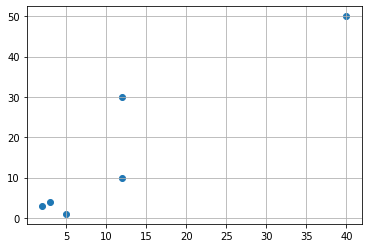

In [135]:
import matplotlib.pyplot as plt

x = list(map(lambda p: p[0], pontos))
y = list(map(lambda p: p[1], pontos))
plt.scatter(x , y)
plt.grid(True)
plt.show()



In [136]:
par_proximo(pontos)

((2, 3), (3, 4))

### Usando Python para gerar um conjunto de pontos aleatório

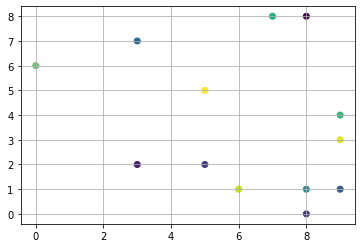

In [148]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
N = 13
x = np.random.randint(10, size=N)
y = np.random.randint(10, size=N)
colors = np.random.rand(N)

plt.scatter(x, y, c=colors)
plt.grid(True)
plt.show()

In [145]:
pontos_2 = list(zip(x,y))
par_proximo(pontos_2)

((8, 0), (8, 1))

In [146]:
par_proximo_bruta(pontos_2)

[(8, 0), (8, 1)]